In [1]:
import autocnet

/usgs/apps/anaconda/envs/autocnet/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
autocnet.__file__

'/usgs/apps/anaconda/envs/autocnet/lib/python3.6/site-packages/autocnet/__init__.py'

In [1]:
import os
os.environ['autocnet_config'] = '/home/jlaura/autocnet_projects/demo.yml'
from autocnet_server.graph.graph import NetworkCandidateGraph
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Ring Matching
TODO: Docs...

{}


Exception in thread jdemo:working:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 634, in run
    callback_func(msg)
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 468, in ring_matcher_callback
    if rm['count'] <= config['cluster']['maxfailures']:
KeyError: 'count'



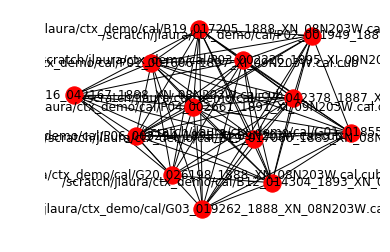

Exception in thread jdemo:done:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 597, in run
    callback_func(msg)
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 434, in compute_fundamental_callback
    if js['count'] <= config['cluster']['maxfailures']:
KeyError: 'count'

Exception in thread jdemo:done:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 597, in run
    callback_func(msg)
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 434, in compute_fundamental_callback
    if js['count'] <= config['cluster']['maxfailures']:
KeyError: 'count'

Exception in thread jdemo:done:
Traceback (mos

In [2]:
ncg = NetworkCandidateGraph.from_database()
ncg.plot(labels=True)

In [7]:
ncg.ring_match(walltime='00:10:00')

#!/bin/bash -l
#SBATCH -n 1
#SBATCH --mem-per-cpu 4000
#SBATCH -o /home/jlaura/logs/slurm-%A_%a.out
#SBATCH -J AutoCNet
#SBATCH -t 00:10:00
#SBATCH -p shortall
#SBATCH --exclude=neb[13-20],gpu1
/home/jlaura/anaconda3/envs/ct/bin/python /home/jlaura/autocnet_server/bin/ring_match.py



72

In [6]:
import pandas as pd
l = []
for i, d in ncg.nodes(data='data'):
    l.append([i, d.nkeypoints])
df = pd.DataFrame(l, columns=['image', 'cnt'])

In [7]:
df.describe()

,image,cnt
count,13.00000,13.000000
mean,20.00000,268136.076923
std,3.89444,65095.697713
min,14.00000,171158.000000
25%,17.00000,232695.000000
50%,20.00000,256394.000000
75%,23.00000,269466.000000
max,26.00000,407107.000000


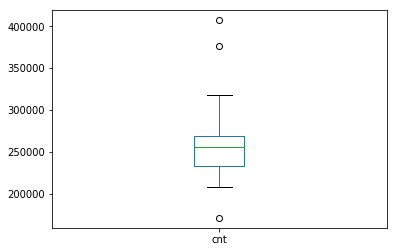

In [10]:
df['cnt'].plot(kind='box')

In [13]:
df

,image,cnt
0,20,265448
1,19,232695
2,14,171158
3,21,252758
4,26,407107
5,22,267410
6,24,317315
7,16,225616
8,23,269466
9,15,207815


In [16]:
ncg.nodes[14]['data'].geodata.raster_size

(5000, 12288)

In [19]:
tdfs = []
for s, d, e in ncg.edges(data='data'):
    if s == 20 or d == 20:
        tdfs.append(e.matches)


In [22]:
df = pd.concat(*tdfs[:5])

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"